In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from pylab import rcParams
import pymysql
import numpy as np
import pandas as pd

%matplotlib inline

In [4]:
def call_mysql():
    con = False
    rows = np.nan
    try:
        con = pymysql.connect(host='localhost', port=3307, user='root', passwd='', db='yelpdata')
        with con:
            cur = con.cursor()
            #myvalues = "'" + yelp_id+"'," + str(stars) + "," + str(reviews) + "," + "1"
            sql = 'USE yelpdata;'
            cur.execute(sql)
            sql = 'SELECT stars,reviews FROM business;' 
            #print(sql)
            cur.execute(sql)
            rows = cur.fetchall()
#             for row in rows:
#                 print(row)
    except pymysql.Error, e:
        print "Error %d: %s" % (e.args[0],e.args[1])
        sys.exit(1)
    finally:
        if con:
            con.close()
    return rows     

In [36]:
def first_graph(array):
    print('My first graph\n')
    sns.set(style="ticks")
    
#     rs = np.random.RandomState(11)
#     x = rs.gamma(2, size=1000)
#     y = -.5 * x + rs.normal(size=1000)

    x = array[:,0]
    y = array[:,1]
    #sns.set_xlabels['stars']
    
    #xtick = plt.xtick(np.array(1,5,.5))
    fig = sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#FFB894")
#     fig.xlabel('Reviews')
#     fig.ylabel('Stars')
    
    fig.set_axis_labels('Stars','Reviews', fontsize=16)

In [37]:
def second_graph(array):
    
    x = array[:,0]
    y = array[:,1]
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    fig = plt.plot(x, y, marker='d', ms=8, mew=.5,lw=0)
    
    plt.setp([ax.set_xlabel('Reviews'),ax.set_ylabel('Stars')],fontsize=16)
    ax.margins(0.05)

My first graph



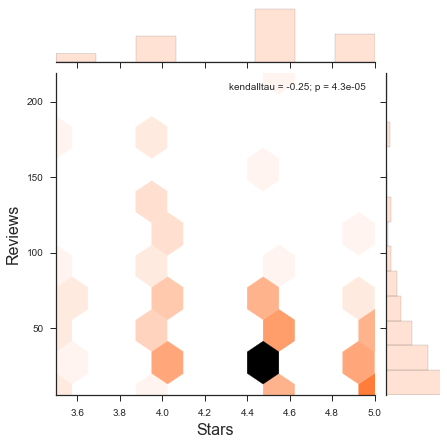

In [38]:
def main():
    data = call_mysql()
    df = np.array([])
    
    #ultimate solution mysql-> DF is probably this
    #df = pd.read_sql
    
    for d in data:
        #print(d)
        df = np.append(df, d, axis=0)
    rows = np.size(df)/2
    #print(rows)
    df = np.reshape(df,(rows,2))
    #print(df)
    
    first_graph(df)
    #second_graph(df)
    
    
if __name__=='__main__':
    main()